In [1]:
import pandas as pd

full_gaz = pd.read_csv('full_gaz.csv')

In [2]:
full_gaz.head()

,Unnamed: 0,Toponym Variant,Authority Name,MoEML @xml:id,Agas Map,All Variants (alternate names and variant spellings),Location category
0,0,Abbey of Bermondſey,Bermondsey Abbey,BERM3,,Abbey of Bermondſey | Barmondſey | Barmondsey ...,Churches
1,1,Abbey of Nunnes,Abbey of St. Clare,ABBE1,Agas Map,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches
2,2,Abbey of Nunnes of the order of Saynt,Abbey of St. Clare,ABBE1,Agas Map,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches
3,3,Abbey of Saint Clare,Abbey of St. Clare,ABBE1,Agas Map,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches
4,4,Abbey of St. Clare,Abbey of St. Clare,ABBE1,Agas Map,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches


In [3]:
print(full_gaz.columns)

Index(['Unnamed: 0', 'Toponym Variant', 'Authority Name', 'MoEML @xml:id',
       'Agas Map', 'All Variants (alternate names and variant spellings)',
       'Location category'],
      dtype='object')


In [4]:
#slice the original data and keep only the variables we are interested in
df = full_gaz[['Authority Name', 'MoEML @xml:id', 
                'All Variants (alternate names and variant spellings)', 'Location category']]


In [5]:
#rename columns 
df.columns = ['name', 'id', 'variants', 'type']
df.head()

,name,id,variants,type
0,Bermondsey Abbey,BERM3,Abbey of Bermondſey | Barmondſey | Barmondsey ...,Churches
1,Abbey of St. Clare,ABBE1,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches
2,Abbey of St. Clare,ABBE1,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches
3,Abbey of St. Clare,ABBE1,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches
4,Abbey of St. Clare,ABBE1,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches


In [6]:
#read in the .txt file
f = open("Bale\'s Chronicle_Redacted.txt", "rb")
words = f.read().decode(errors='replace')

In [23]:
words

'MS. OF THE MARQUIS OF BATH \r(LONGLEAT) \r\n\rIn the same yere after that kyng Richard hadde resigned in the Toure of London ffro thense he was ledde unto the castell of Leedys in Kent. And there he abood a while and ffro thense he was leed to the castell of pountfret in the northe countre and soon aftir he came thethir he dyed: and whan the kyng wyst that he was deed he lett ordyne a lyttir and clothed his body in a cheste and he was bawmid and servyd in lynnyn clothe with his vysage lyeing opene. And soo brought to London wt torche light byrnyng as ought to his astate unto seynt poules and there his enterment was holdyn wt alle the solempnyte of servis that myght be doon. And ffro seynt poules he was brought into the abbey of Westminster and ther \rhe had his deryges and masses wt great solempnyte. And ffro W estmynster he was caaryed to the ffreares of langlee. And ther hee was buryd. \r\rIn the same yeare came the Emperoure of Constantynoble withe meny lordes and knyghtes in to En

In [9]:
#change the 'ſ' in xml data to 's'
df['variants_updated'] = df.apply(lambda x: x['variants'].replace('ſ', 's'), axis = 1)

/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
#convert variants to a list for convenience
df['variants_list'] = df.apply(lambda x: x['variants_updated'].split('|'), axis = 1)

/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df.head()

,name,id,variants,type,variants_updated,variants_list
0,Bermondsey Abbey,BERM3,Abbey of Bermondſey | Barmondſey | Barmondsey ...,Churches,Abbey of Bermondsey | Barmondsey | Barmondsey ...,"[Abbey of Bermondsey , Barmondsey , Barmonds..."
1,Abbey of St. Clare,ABBE1,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches,Abbey of Nunnes | Abbey of Nunnes of the order...,"[Abbey of Nunnes , Abbey of Nunnes of the ord..."
2,Abbey of St. Clare,ABBE1,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches,Abbey of Nunnes | Abbey of Nunnes of the order...,"[Abbey of Nunnes , Abbey of Nunnes of the ord..."
3,Abbey of St. Clare,ABBE1,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches,Abbey of Nunnes | Abbey of Nunnes of the order...,"[Abbey of Nunnes , Abbey of Nunnes of the ord..."
4,Abbey of St. Clare,ABBE1,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches,Abbey of Nunnes | Abbey of Nunnes of the order...,"[Abbey of Nunnes , Abbey of Nunnes of the ord..."


In [24]:
#compare
counts_list = []
loc_list = []
for i in range(0, 6626):
    counts = 0
    for j in df.variants_list[i]:
        if j in words:
            print(i)
            print(j)
            counts += 1
            loc_list.append(j)
        else: 
            loc_list.append('None')
    counts_list.append(counts)

6
 Westminster 
6
 Westminster 
36
 Algate 
36
 gate 
38
 Algate 
38
 gate 
46
 gate
65
 gate
68
 gate
89
 Algate 
89
 gate 
105
 gate
106
 Algate 
106
 gate 
107
 Algate 
107
 gate 
229
 church 
230
 Barre 
230
 temple barre 
231
 Westminster 
231
 Westminster 
237
 Arundell 
238
 Arundell 
239
 Arundell 
240
 Arundell 
244
 Arundell 
245
 Arundell 
246
 Arundell 
248
 Arundell 
249
 Arundell 
250
 Arundell 
251
 Arundell 
252
 Arundell 
253
 Arundell 
255
 Arundell 
340
Barre 
341
 Barre 
341
 temple barre 
343
Barre 
344
 Barre 
344
 temple barre 
349
Barre 
351
Barre 
353
 Smythfyld 
399
 Arundell 
400
 Arundell 
402
 Arundell 
403
 Arundell 
405
 Arundell 
406
 Arundell 
473
bell 
474
bell 
475
bell 
479
bell 
480
bell 
481
bell 
482
bell
601
 Arundell 
602
 Arundell 
603
 Arundell 
604
 Arundell 
605
 Arundell 
610
 gate
611
 gate
616
 gate
617
 gate
618
 gate
623
 gate
626
 gate
629
 gate
631
 gate
632
 gate
652
 gate
741
 gate
759
 Southwark 
759
 Westminster
761
 Southwark 
76

4755
 church 
4772
church 
4773
church 
4776
church 
4841
Newgate 
4868
 Paules 
4868
 Powles 
4869
 Paules 
4869
 Powles 
4870
 Paules 
4870
 Powles 
4871
 Paules 
4871
 Powles 
4872
 Paules 
4872
 Powles 
4873
 Paules 
4874
 Paules 
4874
 Powles 
4875
 Westminster 
4875
 Westminster 
4876
 Westminster 
4876
 Westminster 
4877
 Westminster 
4877
 Westminster 
4884
 Westminster 
4884
 Westminster 
4934
 Paules 
4934
 Powles 
4971
 Paules 
4971
 Powles 
4998
 church 
5015
church 
5016
church 
5017
church 
5018
church 
5041
 Paules 
5041
 Powles 
5042
 Paules 
5042
 Powles 
5043
 Paules 
5043
 Powles 
5044
 Paules 
5044
 Powles 
5045
 Paules 
5046
 Paules 
5046
 Powles 
5047
 Paules 
5047
 Powles 
5048
 Paules 
5048
 Powles 
5049
 Paules Crosse 
5051
 Paules 
5051
 Powles 
5067
 Salisbury place
5070
 Salisbury place
5076
church 
5107
 Westminster
5110
Scotland 
5111
Scotland 
5150
 Arundell 
5232
 Smythfyld 
5233
 Smythfyld 
5234
 Smythfyld 
5235
 Smythfyld 
5237
 Smythfyld 
5244
 Smythf

In [13]:
#counts 
counts_list

[0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,


In [19]:
#append counts to data
df['counts'] = counts_list

In [20]:
df.head()

,name,id,variants,type,variants_updated,variants_list,counts
0,Bermondsey Abbey,BERM3,Abbey of Bermondſey | Barmondſey | Barmondsey ...,Churches,Abbey of Bermondsey | Barmondsey | Barmondsey ...,"[Abbey of Bermondsey , Barmondsey , Barmonds...",0
1,Abbey of St. Clare,ABBE1,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches,Abbey of Nunnes | Abbey of Nunnes of the order...,"[Abbey of Nunnes , Abbey of Nunnes of the ord...",0
2,Abbey of St. Clare,ABBE1,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches,Abbey of Nunnes | Abbey of Nunnes of the order...,"[Abbey of Nunnes , Abbey of Nunnes of the ord...",0
3,Abbey of St. Clare,ABBE1,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches,Abbey of Nunnes | Abbey of Nunnes of the order...,"[Abbey of Nunnes , Abbey of Nunnes of the ord...",0
4,Abbey of St. Clare,ABBE1,Abbey of Nunnes | Abbey of Nunnes of the order...,Churches,Abbey of Nunnes | Abbey of Nunnes of the order...,"[Abbey of Nunnes , Abbey of Nunnes of the ord...",0


In [22]:
len(df)

6626

NameError: name 'plt' is not defined

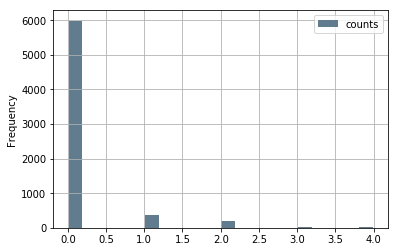

In [21]:
#explore the results
df.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')

In [193]:
#export data
df.to_csv('cross_ref_results.csv')
df.to_excel('cross_ref_results.xlsx')